$
\newcommand{\fsamp}{{F_s}}
\newcommand{\unit}[1]{\mathrm{\,#1}}
\newcommand{\tmidx}{n}
\newcommand{\tds}[2][\tmidx]{{#2(#1)}}
\newcommand{\matcmd}[2][(\cdot)]{\texttt{#2}#1}
\renewcommand{\matcmd}[2][(\cdot)]{\mathrm{#2}#1}
\newcommand{\fcn}[1]{{\text{#1}}}
\newcommand{\bigcb}[1]{{\big\{#1\big\}}} 
\newcommand{\Bigcb}[1]{{\Big\{#1\Big\}}}
\newcommand{\bigsb}[1]{{\big[#1\big]}} 
\newcommand{\Bigsb}[1]{{\Big[#1\Big]}}
\newcommand{\biggsb}[1]{{\bigg[#1\bigg]}}
\newcommand{\pyt}{\matcmd[]{Python}}
$

# Basic concepts of continuous- and discrete-time signal processing

The goal of this exercise is to gain practical insights into fundamental signal processing concepts such as signal _sampling_, aliasing, windowing and the Fourier transform. These methods and concepts are commonly applied in medical signal and image analysis and a good understanding of these basics is essential  required. For more information on these concepts, check the course slides and notes.

## Required modules

During this practical session, the following libraries will be used:

- `numpy`
- `matplotlib`
- `scipy`

To import any external library, you need to import it using the **`import`** statement followed by the name of the library (e.g. `import numpy as np`). These imports have already been done for you in the code segment above. Please refer to the `importstatements.py` file related to _this_ project for examples. Further projects will come with their own `importstatements.py` function, where only the typical packages required for _that_ project will be imported. This will help preserve the modularity of the notebook.

## Exercise: Sampling and the discrete Fourier transform

Consider a sine wave signal with frequency $F=2\unit{Hz}$ and a length of $1\unit{s}$. Sample the signal with a sampling frequency $\fsamp=128\unit{Hz}$.

<div class="alert alert-info">

**Task**  
    
- Generate the sampled signal. Call it $x$.
- Plot the sampled signal (use discrete points '*') against time. Label the x-and y-axes clearly. You can define the time axis with the functions [`arange`][arg]. Please click on the function name to see the corresponding documentation. Please read it _carefully_ to understand the outputs they produce.
- Additional help with plot is available in the documentation of Matplotlib. An link to [`xlabel`][xlabel] is included, you can look up similarly for `ylabel`, `title` etc.
- Similarly, look up documentation for the different plotting styles. [This][pltstyle] may be a quick (unofficial) reference.
</div>

Your answer should look like:

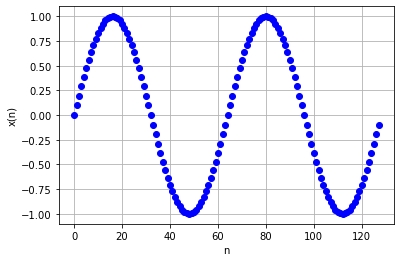

[lsp]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
[arg]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html
[xlabel]: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
[pltstyle]: https://www.geeksforgeeks.org/line-plot-styles-in-matplotlib/

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

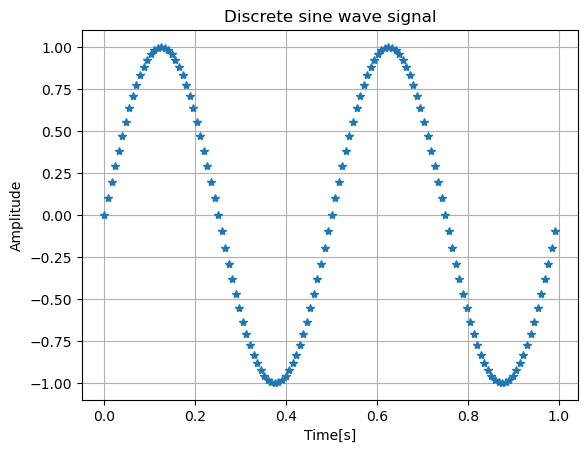

In [ ]:
# Include code for the above task here. Define variables clearly and unambiguously.
fs = 128
F = 2
T = 1.0 # Time in seconds.
nTs = np.arange(0,T*fs)/fs # Defining the sampling time instants for T seconds.
x = np.sin(2*np.pi*F*nTs)# Define the sine signal based on nTs.

# Below is a template to plot the signal
fig = plt.figure(); fig.clf()
axSignal = fig.add_subplot(111)
axSignal.plot(nTs,x,"*") # Plot the sampled signal ... 
                       # see documentation to plot as discrete points

# use xlabel and ylabel to add the correct labels.
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
# use title to add a nice title to the plot.
plt.title("Discrete sine wave signal")
# also look up how to add a grid to the plot. 
plt.grid()


plt.show()


Now we shall perform the spectral decomposition of this signal. As we have seen, spectral decomposition is the process by which a signal can be expressed as the sum of sinusoids with different frequencies (spectrum). For discrete-time (sampled) signals, we use the discrete Fourier transform (DFT) for the spectral decomposition. The DFT is optimally implemented using the _fast_ Fourier transform, usually termed the FFT. Note that, for a real-valued signal, the DFT yields a complex valued spectrum containing the _phase_ and the _magnitude_ of each frequency component.

<div class="alert alert-info">

**Task**
    
- Calculate the DFT of `x` using functions [`fft.fft`][fft] and plot the magnitude of the DFT. Use the functions [`np.abs`][abs] and [`fft.fftfreq`][ffreq] for this. 
- Plot the magnitude spectrum with the frequency variable along the x-axis. _Clearly_ label and limit the axes
    
*Hint* You may need the [`fftshift`][fshift] function during plotting to obtain easily interpretable results.
</div>

What your answer should look like:

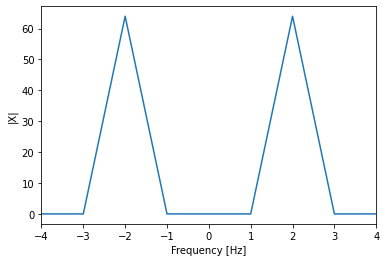

[fft]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html
[ffreq]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html
[fshift]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftshift.html
[abs]: https://numpy.org/doc/stable/reference/generated/numpy.absolute.html

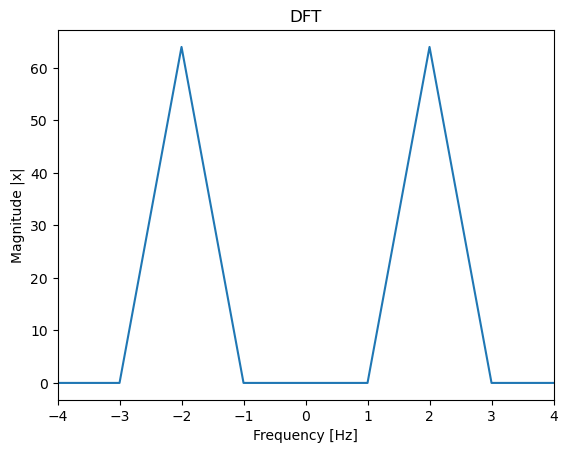

In [ ]:
# Include your code here. A template is provided
X = np.fft.fft(x)
n = fs*T
timestep = T/fs
freq = np.fft.fftfreq(int(n), d=timestep)
freq, X=np.fft.fftshift((freq, X), axes=1)#シフト有り無しの違いを見てみたい
Amp = np.abs(X)
# Below is a template to plot the magnitude spectrum
fig = plt.figure(); fig.clf()
axMagnitude = fig.add_subplot(111)

axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum

plt.xlim([-4, 4])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude |x|")
plt.title("DFT")

plt.show()


<div class="alert alert-info">
    
**Task** 

From the DFT analysis of your signal answer the following
    
- Where do you see the frequency of the generated pure tone? 
- Is this what you expect?

Please answer in the cell below.
</div>

<div class="alert alert-success">
<span style="color:black">

    
* Please ignore the above tags and markup script. 
* Please enter your answer/explanation here. 
* Please do not remove the tags above and below. Use `Markdown` mode for this cell. 
* You may use \LaTeX formatting if you require to insert any mathematical formulae (e.g. $x_1=\sin(2\pi f t)$).

Note that this only applies to the cells where a textual answer/analysis is required.

##### ・ Where do you see the frequency of the generated pure tone? ##### 

I can see two peaks on 2[Hz] and -2[Hz].

##### ・  Is this what you expect?

Though the sampled signal is decreated, I can tell that the wave has the frequency of 2 Hz.
Therefore, I was able to expect that the sectrum of the signal would show a peak on 2 Hz.
However, I did not expect there would an extra peak on -2 Hz


 


## Exercise: Sampling and Nyquist Frequency
We shall now investigate the effect of sampling and _aliasing_. For this we shall consider an underlying (continuous-time) signal that consists of the sum of $K=4$ different sinusoids. Each sinusoidal component $k$ is given by the general equation $A_k \sin\big(2 \pi f_k t\big)$. The $A_k$ and $f_k$ are as follows:

- $A_1 = 0.3$, $f_1=10\unit{Hz}$
- $A_2 = 0.4$, $f_2 = 30\unit{Hz}$
- $A_3 = 0.5$, $f_3 = 50\unit{Hz}$
- $A_4 = 0.2$, $f_4 = 80\unit{Hz}$

<div class="alert alert-info">
    
**Task** 

What constraint should the sampling frequency $\fsamp$ satisfy for correctly sampling this signal?
Please answer in the cell below.
</div>

<div class="alert alert-success">
<span style="color:black">

    
Your answer/explanation here. Please do not remove the tags above and below. Use `Markdown` mode for this cell. 


According to the Nyquist-Shannon sampling theorem, the sampling Frequency should be at least twice the highest frequency sinusoidal component in order to correctly sample a signal. Therefore, since this given analogue signal contans 80Hz at most, we should sample at least 160Hz to satisfy for correctly sampling this signal.



Now consider that we observe this analogue signal for a duration of $5\unit{s}$. 

<div class="alert alert-info">
    
**Task** 

Assume the sampling frequency is $\fsamp=200\unit{Hz}$.    

- Plot the sampled signal (use continuous line for the plotting, not discrete points). Label the axes correctly and _clearly_. 
- Compute and plot the amplitude spectrum of this signal using the DFT
- Based on these plots, is the spectrum what you expect to see?     
</div>

What your answer should look like:

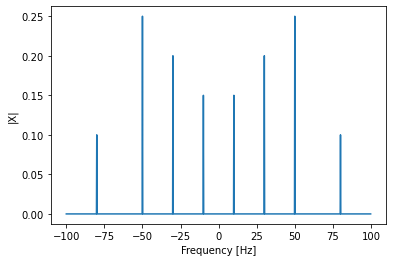

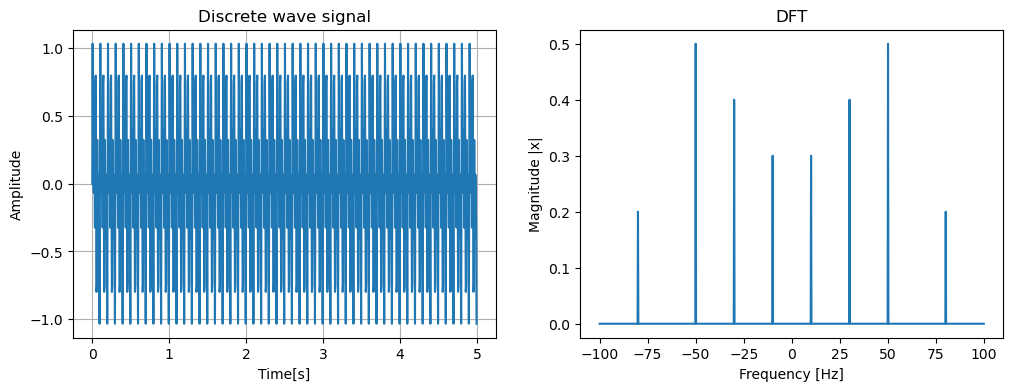

In [ ]:
# Please write your code to generate the sampled signal and the requested plots here.
fs = 200
T = 5.0 # Time in seconds.
nTs = np.arange(0,T*fs)/fs # Defining the sampling time instants for T seconds.

a1 = 0.3*np.sin(2*np.pi*10*nTs)
a2 = 0.4*np.sin(2*np.pi*30*nTs)
a3 = 0.5*np.sin(2*np.pi*50*nTs)
a4 = 0.2*np.sin(2*np.pi*80*nTs)

x = a1 + a2 + a3 + a4

fig = plt.figure(figsize=(12,4)); fig.clf()
axSignal = fig.add_subplot(121)
axSignal.plot(nTs,x)

plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.title("Discrete wave signal")
plt.grid()

### Fourie Transform ###
X = np.fft.fft(x)
n = T*fs #duration * fs
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
X = X / n

freq, X = np.fft.fftshift((freq, X), axes=1)
Amp = np.abs(X)
axMagnitude = fig.add_subplot(122)
axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude |x|")
plt.title("DFT")

plt.show()

<div class="alert alert-success">
<div class="alert alert-info">
<span style="color:blue">

##### ・ Based on these plots, is the spectrum what you expect to see?

**The sampled signal does not show typical wave shape, it looks more like many plots are just randamly scattered. Therefore, I could not expect how the spectrum would be only with the sampled singal.
However, with the provided valuses of amplitude $A_k$ and frequency $f_k$, I could expect that peaks would show on the each of thier given frequency and ampitude.**


<div class="alert alert-info">
    
**Task** 

Now, assume the analogue signal was sampled at a sampling frequency of $\fsamp=100\unit{Hz}$.    

- Plot the sampled signal (use continuous line for the plotting, not discrete points). Label the axes correctly and _clearly_. 
- Compute and plot the amplitude spectrum of this signal using the DFT
- Based on these plots, explain the spectrum you obtain.
- Previously you defined the 3rd sinusiod as $A_3\sin(2\pi F_3t)$. How does the spectrum you obtain change if you design this as $A_3\cos(2\pi F_3t)$? Can you explain the difference?
</div>

What your answer should look like:

<table><tr>
<td> 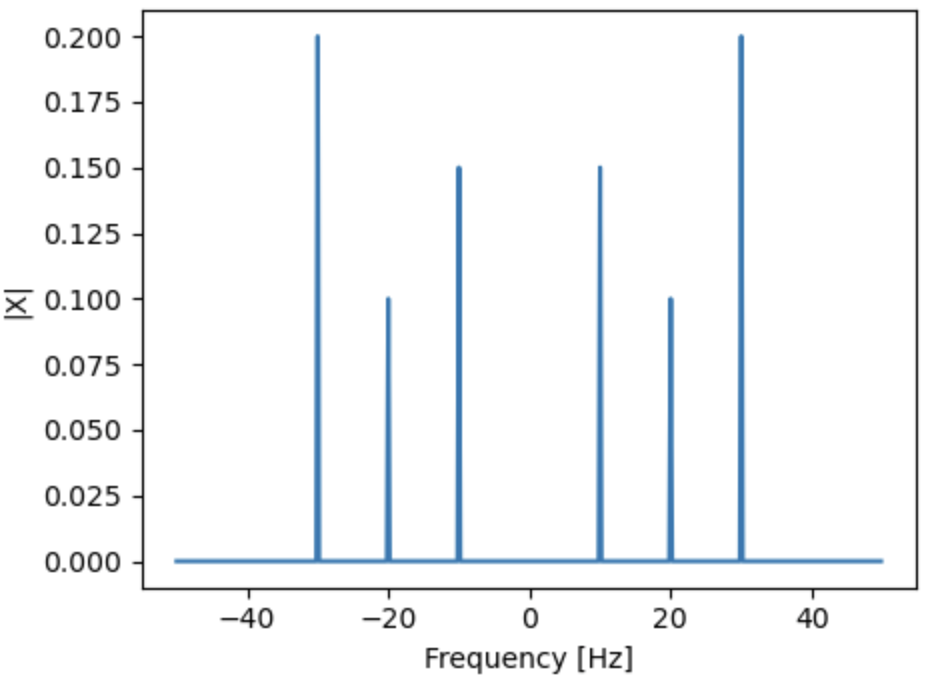 </td>
<td> 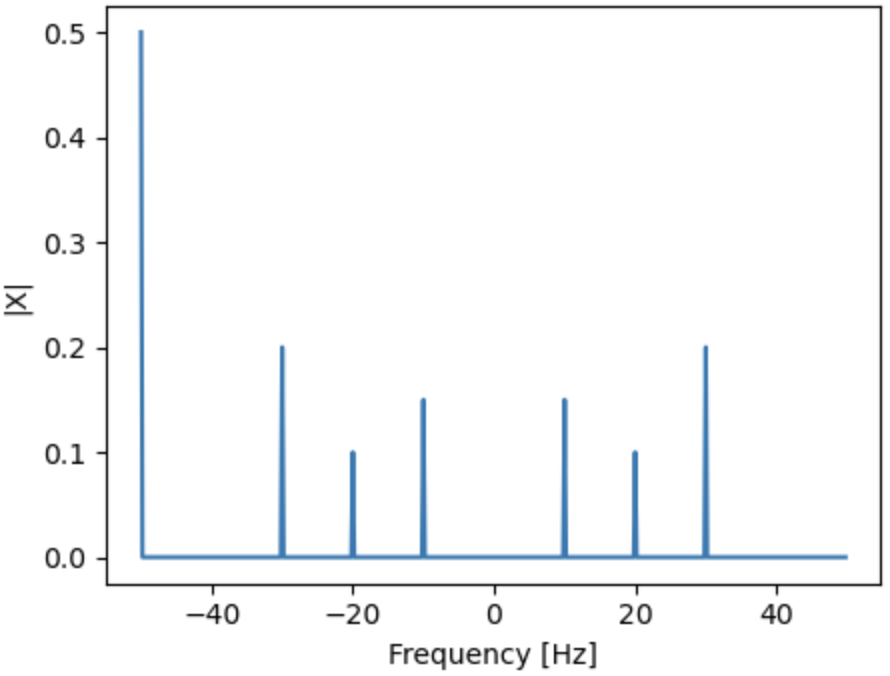 </td>
</tr>
    <td> Using the <b>sine</b> for the 3rd sinusoid </td>
    <td> Using the <b>cosine</b> for the 3rd sinusoid </td>
</table>    


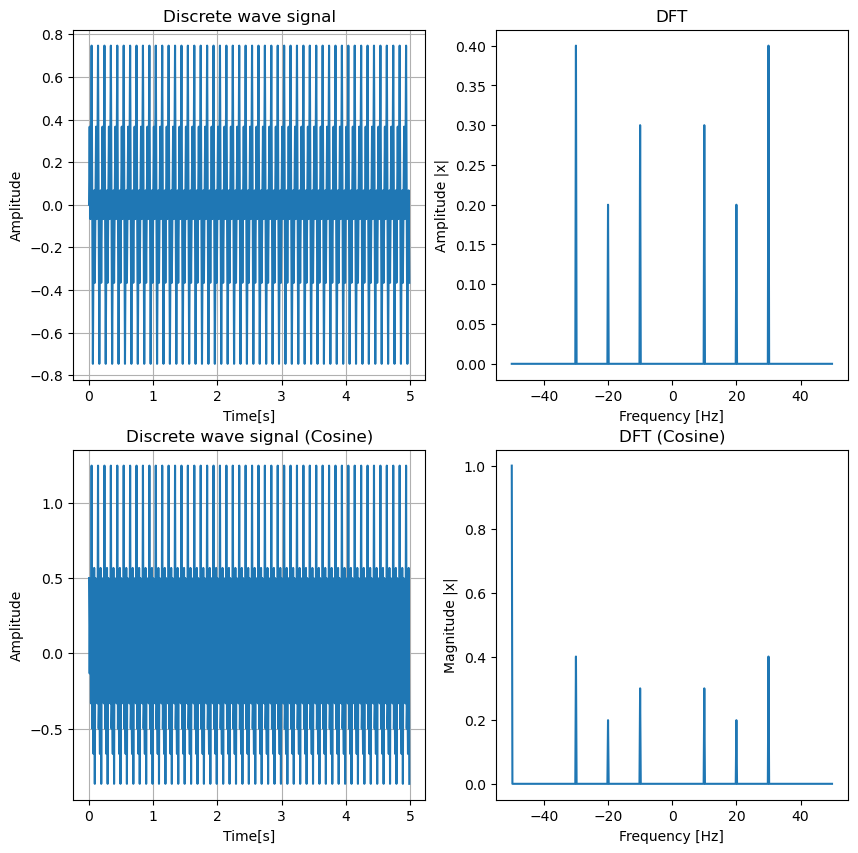

In [232]:
# Please write your code to generate the sampled signal and the requested plots here.
fs = 100
T = 5.0 # Time in seconds.
nTs = np.arange(0,T*fs)/fs # Defining the sampling time instants for T seconds.

a1 = 0.3*np.sin(2*np.pi*10*nTs)
a2 = 0.4*np.sin(2*np.pi*30*nTs)
a3 = 0.5*np.sin(2*np.pi*50*nTs)
a4 = 0.2*np.sin(2*np.pi*80*nTs)

x = a1 + a2 + a3 + a4
fig = plt.figure(figsize = (10,10)); fig.clf()
axSignal = fig.add_subplot(221)
axSignal.plot(nTs,x) 
plt.title("Discrete wave signal")
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.grid()

### Fourie Transformation ###
X = np.fft.fft(x)
n = T*fs
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
X = X / n

freq, X = np.fft.fftshift((freq, X), axes=1)
Amp = np.abs(X)
axMagnitude = fig.add_subplot(222)
axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum

plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude |x|")
plt.title("DFT")

a3c = 0.5*np.cos(2*np.pi*50*nTs)
x = a1 + a2 + a3c + a4

axSignal = fig.add_subplot(223)
axSignal.plot(nTs,x) 
plt.title("Discrete wave signal (Cosine)")
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.grid()

### Fourie Transformation ###
X = np.fft.fft(x)
n = fs*T
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
X = X / n

freq, X = np.fft.fftshift((freq, X), axes=1)
Amp = np.abs(X)
axMagnitude = fig.add_subplot(224)
axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum

plt.title("DFT (Cosine)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude |x|")

plt.show()

<div class="alert alert-success">
<div class="alert alert-info">
<span style="color:blue">

##### ・Based on these plots, explain spectrum you obtained

**Since we chose a sampling frequency of 100Hz, one of the sinusoidal componet (k=4) could not be calculated well. This is because mathmatically a sampling frequency should be equal to or larger than the twice value of frequency in the signal according to  the Nyquist-Shannon sampling theorem.**
##### **$\fsamp ≧ 2 f_{max}$**
**However, we selected 100Hz as a sampling frequency although the given signal contains a sinusoidal component that has a frequency of 80Hz**

##### ・Previously you defined the 3rd sinusiod as $A_3\sin(2\pi F_3t)$. How does the spectrum you obtain change if you design this as $A_3\cos(2\pi F_3t)$? Can you explain the difference?

**If we changed $A_3\sin(2\pi F_3t)$ to $A_3\cos(2\pi F_3t)$ , the spectrum showed the greatly high frequency on the far left in the graph, which would not occur with the previous sampled signal. This tells the existence of discontinuities in the changed one.**


## Exercise: Spectral decomposition and zero-padding

We shall now see what happens when we compute the DFT of the same signal, but for different durations. For this, we will recreate the analogue signal of the previous exercise and consider it is sampled at $\fsamp=200\unit{Hz}$. 

<div class="alert alert-info">
    
**Task** 

- Generate two versions of the sampled signal: one with a duration of 1 second and one which has a shorter duration (e.g. 0.35 s).
- Compute and plot the amplitude spectrum of these signals using the DFT
- Based on these plots, explain the difference you observe between the DFT magnitude spectrum of the shorter and longer signal.
</div>

What your answer should look like (left, 1 second long; right 0.35s long):
<div>
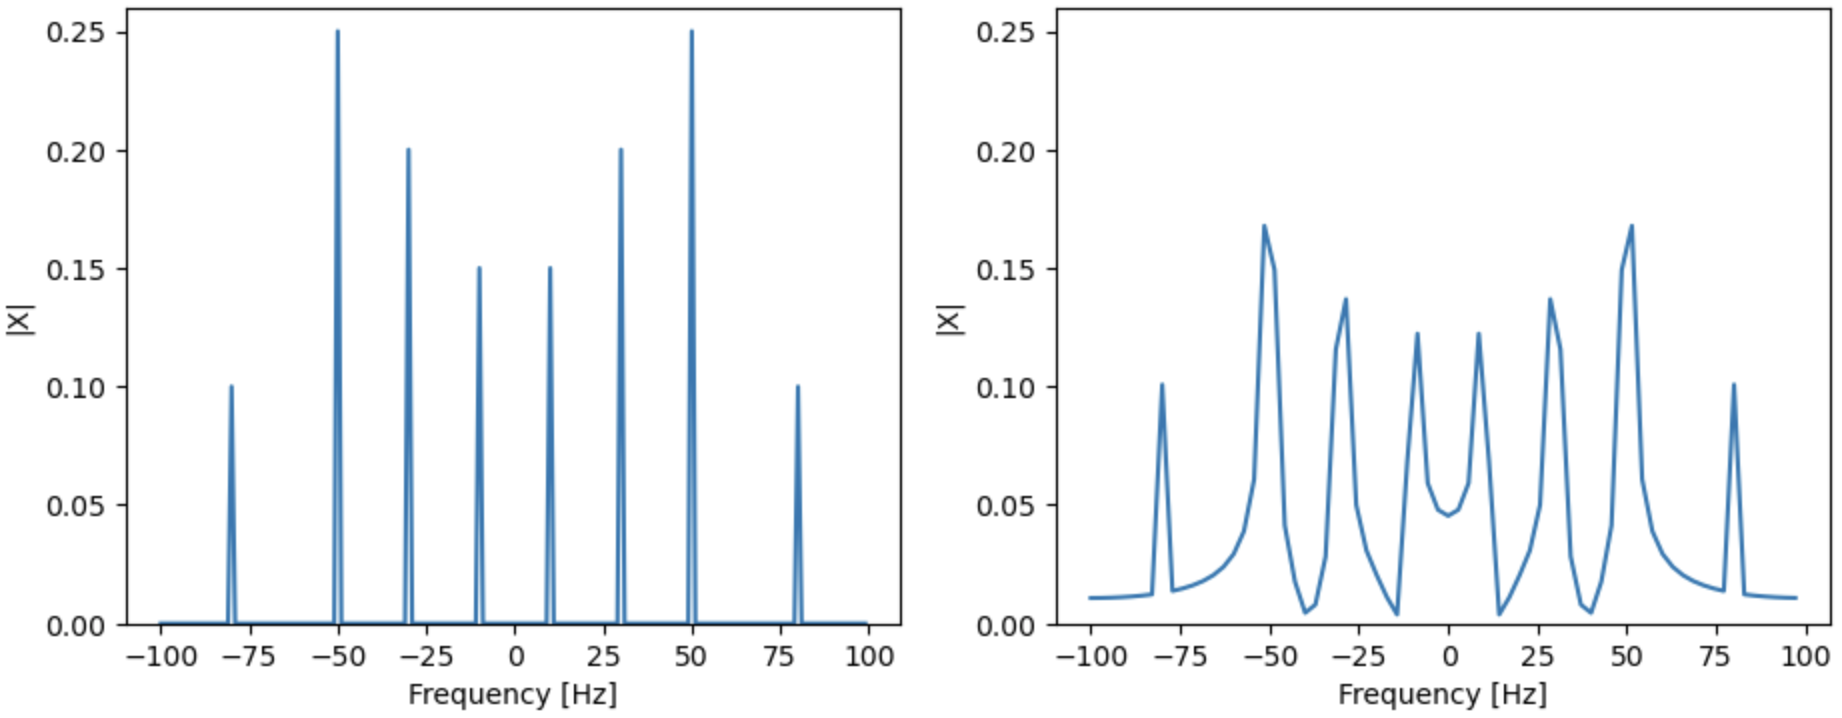
</div>

(70,)
(70,)


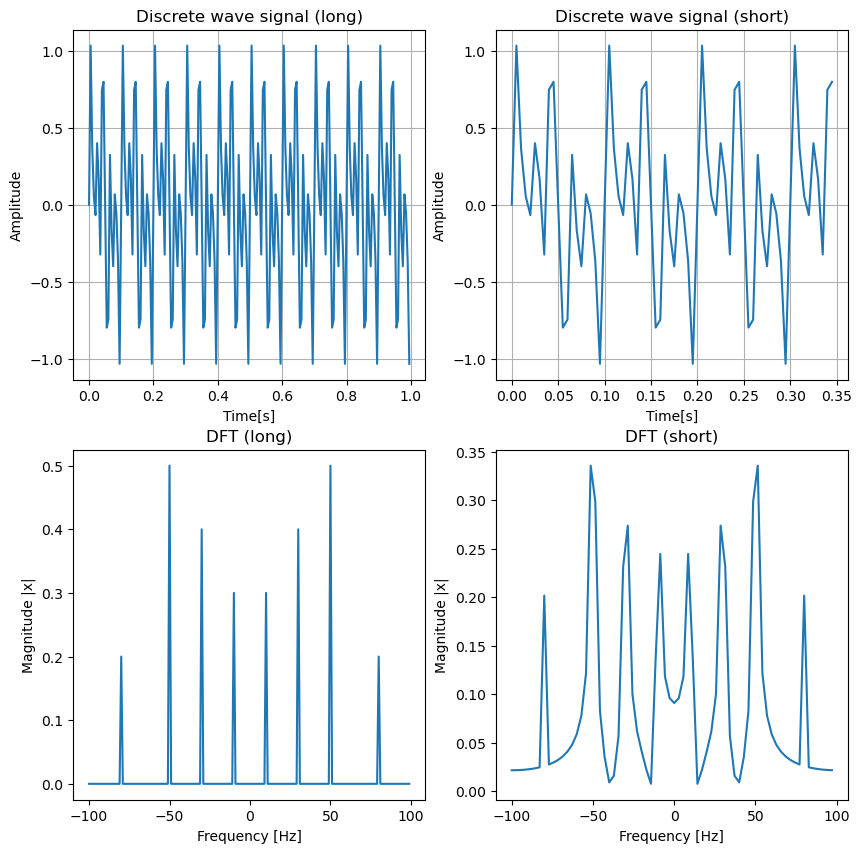

In [233]:
fs = 200
#### long ####
T_l = 1 # Time in seconds.
nTs_l = np.arange(0,T_l*fs)/fs # Defining the sampling time instants for T seconds.

a1 = 0.3*np.sin(2*np.pi*10*nTs_l)
a2 = 0.4*np.sin(2*np.pi*30*nTs_l)
a3 = 0.5*np.sin(2*np.pi*50*nTs_l)
a4 = 0.2*np.sin(2*np.pi*80*nTs_l)

x_long = a1 + a2 + a3 + a4

fig = plt.figure(figsize=(10,10)); fig.clf()
axSignal = fig.add_subplot(221)
axSignal.plot(nTs_l,x_long)

plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.title("Discrete wave signal (long)")
plt.grid()

#### short ####
T_s = 0.35 # Time in seconds.
nTs_s = np.arange(0,T_s*fs)/fs # Defining the sampling time instants for T seconds.

a1 = 0.3*np.sin(2*np.pi*10*nTs_s)
a2 = 0.4*np.sin(2*np.pi*30*nTs_s)
a3 = 0.5*np.sin(2*np.pi*50*nTs_s)
a4 = 0.2*np.sin(2*np.pi*80*nTs_s)

x_short = a1 + a2 + a3 + a4

axSignal = fig.add_subplot(222)
axSignal.plot(nTs_s,x_short)

plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.title("Discrete wave signal (short)")
plt.grid()

### Fourie Transform (long) ###
Xlong = np.fft.fft(x_long)
n = fs*T_l
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Xlong = Xlong / n

freq, Xlong = np.fft.fftshift((freq, Xlong), axes=1)
Amp = np.abs(Xlong)
axMagnitude = fig.add_subplot(223)
axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude |x|")
plt.title("DFT (long)")

### Fourie Transform (short)###
Xshort = np.fft.fft(x_short)
n = fs*T_s
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Xshort = Xshort / n
freq, Xshort = np.fft.fftshift((freq, Xshort), axes=1)
Amp = np.abs(Xshort)
axMagnitude = fig.add_subplot(224)
axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude |x|")
plt.title("DFT (short)")

plt.plot

print(Xshort.shape)
print(freq.shape)


<div class="alert alert-success">
<div class="alert alert-info">
<span style="color:blue">

##### ・explain the difference you observe between the DFT magnitude spectrum of the shorter and longer signal.
**The result shows that with a longer signal, the resolution of magnitude in the spectrum is very clear, while a shorter duration resulted in a weak resolution of the spectrum. This difference is owing to the number of sampling data points.**

**Alos,You can easily tell the number of data points in a shorter period is fewer than in a longer period by looking at the decrese-signal-wave graph.**

##### **$N_{s(long)} = 1.0[s] * 200[1/s] = 200 data  points$**
##### **$N_{s(short)} = 0.35[s] * 200[1/s] = 70  data  points$**
**This tells us that sampling data points have a lot to do with the spectrum resolution.**
**Therefore, more data points means to higher resolution.**

Next, we shall artificially increase the signal length of the shorter signal by appending zeros to the end of the sequence. This is termed as _zero-padding_. 

This can be easily done by adding the `n` argument in the `fft` function. Alternatively, in the time-domain you can use the `np.zeros` function to create a vector of zeros which you can append to the signal vector to get a zero-padded sequence of the desired length. We shall now investigate the influence of zero-padding on the spectral representation/decomposition of the signal.

<div class="alert alert-info">
    
**Task** 

- Zero-pad the shorter signal so that the zero-padded sequence has lenghts of $0.5\unit{s}$, $0.75\unit{s}$ and $1\unit{s}$.
- Compute and plot the amplitude spectra of these zero-padded signals using the DFT
</div>

What your answer should look like:
<div>
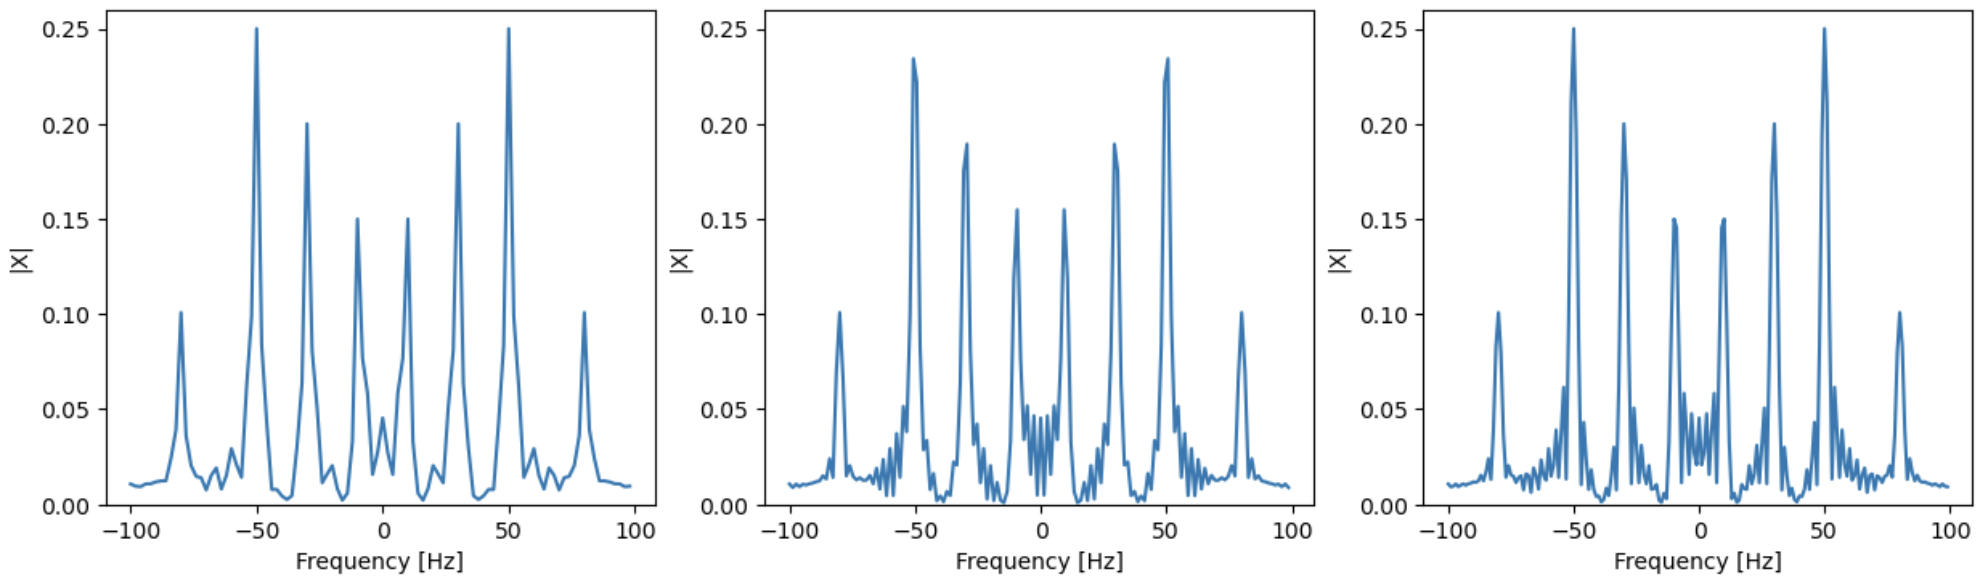
</div>

<function matplotlib.pyplot.show(close=None, block=None)>

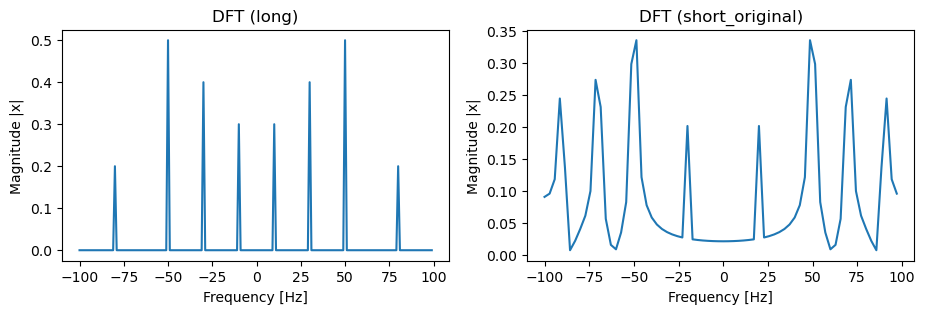

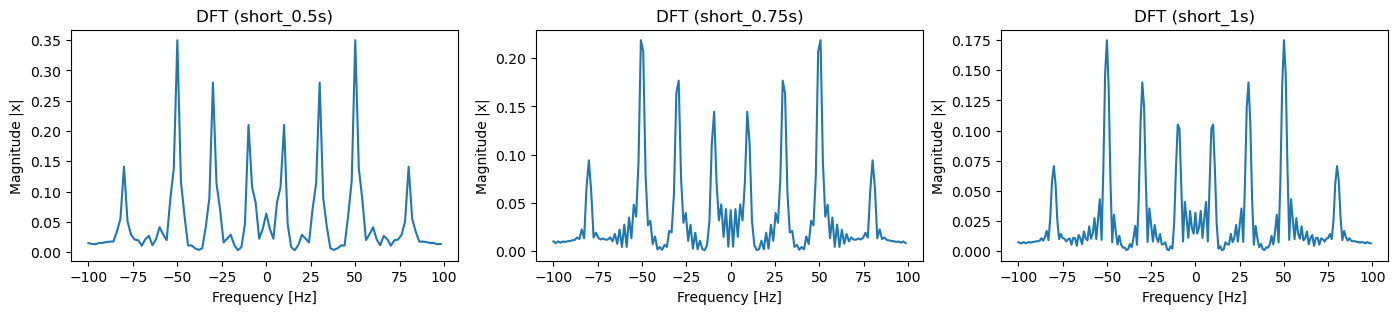

In [234]:
### Zero-pad ###
# Make sure what values x_short contains
# x_short.shape = 70
a_30 = np.zeros(30)## 0.5s
x_short_05 = np.concatenate([x_short,a_30])
# x_short_05.shape = 100

a_80 = np.zeros(80)## 0.75s
x_short_075 = np.concatenate([x_short,a_80])
# x_short_075.shape = 150

a_130 = np.zeros(130)## 0.75s
x_short_1 = np.concatenate([x_short,a_130])
x_short_1.shape

### DFT ###

### Fourie Transform (long) ###
Xlong = np.fft.fft(x_long)
n = fs*T_l
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Xlong = Xlong / n

freq, Xlong = np.fft.fftshift((freq, Xlong), axes=1)
Amp = np.abs(Xlong)
fig = plt.figure(figsize=(17,3)); fig.clf()
axMagnitude = fig.add_subplot(131)
axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude |x|")
plt.title("DFT (long)")

Xshort = np.fft.fft(x_short)
n = fs*T_s # duration * fs
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Xshort = Xshort / n
freq, Xlong = np.fft.fftshift((freq, Xshort), axes=1)
Amp = np.abs(Xshort)
axMagnitude = fig.add_subplot(132)
axMagnitude.plot(freq,Amp) #

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude |x|")
plt.title("DFT (short_original)")


### Interpolating 0.5s ###
Xshort_05 = np.fft.fft(x_short_05)
n = fs*T_s+30 # duration * fs
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Xshort_05 = Xshort_05 / n
freq, Xshort_05 = np.fft.fftshift((freq, Xshort_05), axes=1)
Amp = np.abs(Xshort_05)
fig = plt.figure(figsize=(17,3)); fig.clf()
axMagnitude = fig.add_subplot(131)
axMagnitude.plot(freq,Amp) 

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude |x|")
plt.title("DFT (short_0.5s)")

### Interpolating 0.75s ###
Xshort_075 = np.fft.fft(x_short_075)
n = fs*T_s+80 # duration * fs + interpolating
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Xshort_075 = Xshort_075 / n
freq, Xshort_075 = np.fft.fftshift((freq, Xshort_075), axes=1)
Amp = np.abs(Xshort_075)
axMagnitude = fig.add_subplot(132)
axMagnitude.plot(freq,Amp) 

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude |x|")
plt.title("DFT (short_0.75s)")

### Interpolating 1s ###
Xshort_1 = np.fft.fft(x_short_1)
n = fs*T_s+130 # duration * fs + interpolating
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Xshort_1 = Xshort_1 / n
freq, Xshort_1 = np.fft.fftshift((freq, Xshort_1), axes=1)
Amp = np.abs(Xshort_1)
axMagnitude = fig.add_subplot(133)
axMagnitude.plot(freq,Amp) 

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude |x|")
plt.title("DFT (short_1s)")

plt.show

<div class="alert alert-info">
    
**Task** 

Based on these plots, answer the following questions:

- Compare the spectrum obtained after zero-padding to the amplitude spectrum of the longer sequence (`Xlong`) and the amplitude spectrum of the non-zero-padded short sequence. What do you observe?
- What can be a benefit of using zero-padding? 
- If you are recording a biomedical, cortical EEG signal and you require a resolution of 1 Hz to identify the energy in the alpha band of 5 Hz, what should the minimum duration of your EEG recording window be?
</div>


<div class="alert alert-success">
<div class="alert alert-info">
<span style="color:blue">

#### ・Compare the spectrum obtained after zero-padding to the amplitude spectrum of the longer sequence (`Xlong`) and the amplitude spectrum of the non-zero-padded short sequence. What do you observe?.
**Comparing the sectrum obtained after zero-padding to the amplitude sectrum of longer sequence(Xlong),the shape of the spectrum has looked a little bit more similar to the that of longer period. And, frequency resolution, after zero-padding, has been improved (if you see the locations of the peaks, you can tell that they has become closer to the longer sequence spectrum.**
**Comparing this to the amplitude spectrum of the non-zero-padded short sequence, althogh we can still see the trace of the original shape, the more zero-padding, the more improvement of resolution is.**
**Also, we can have an idea of that the more zero-padding the, the less magnitude it becomes.**
**Since we just added more zero value in the original samlpled signal , What we have to make sure is that zero-padding alone does not create a new information about it. This technique will just provide more details of already existting frequency.**

#### ・What can be a benefit of using zero-padding?
**The benefit of using zero-padding  can be the resolution improvement in frequecy.**

#### ・If you are recording a biomedical, cortical EEG signal and you require a resolution of 1 Hz to identify the energy in the alpha band of 5 Hz, what should the minimum duration of your EEG recording window be?

**Rec = fs/N = fs/fs*T -> 1/T therefore, since you require a resolution of 1Hz ,in order to to identify the energy in the alpha band of 5 Hz, at least 1s is necessary.**


## Exercise: Windowing and spectrogram

Thus far we should have had no issues with plottig the spectra and observing the frequency components at the expected locations. This was because the signal durations were usually chosen to be a complete number of periods of the underlying sinusoids. Now we shall examine what happens when this is not the case and what to do in such situations.

<div class="alert alert-info">
    
**Task** 

- Make a signal $x_1$ which is the sum of two sine function of frequencies $F_1 = 10\unit{Hz}$ and $F_2 = 20\unit{Hz}$. The duration of the signal is $0.5\unit{s}$ and $\fsamp=1000\unit{Hz}$. 
- Calculate the DFT and plot the amplitude spectrum of this signal.
- Now generate another signal (call it $x_2$), which has the same frequencies as above, but with a length of $0.511\unit{s}$. 
- Compute and plot the magnitude spectrum of this signal and compare it to spectrum of the previous case.
- What do you observe? What could give rise to this effect? **Tip:** Plot the time domain signal in each case. Does this give you any ideas? 

</div>

What your answer should look like:
<div>
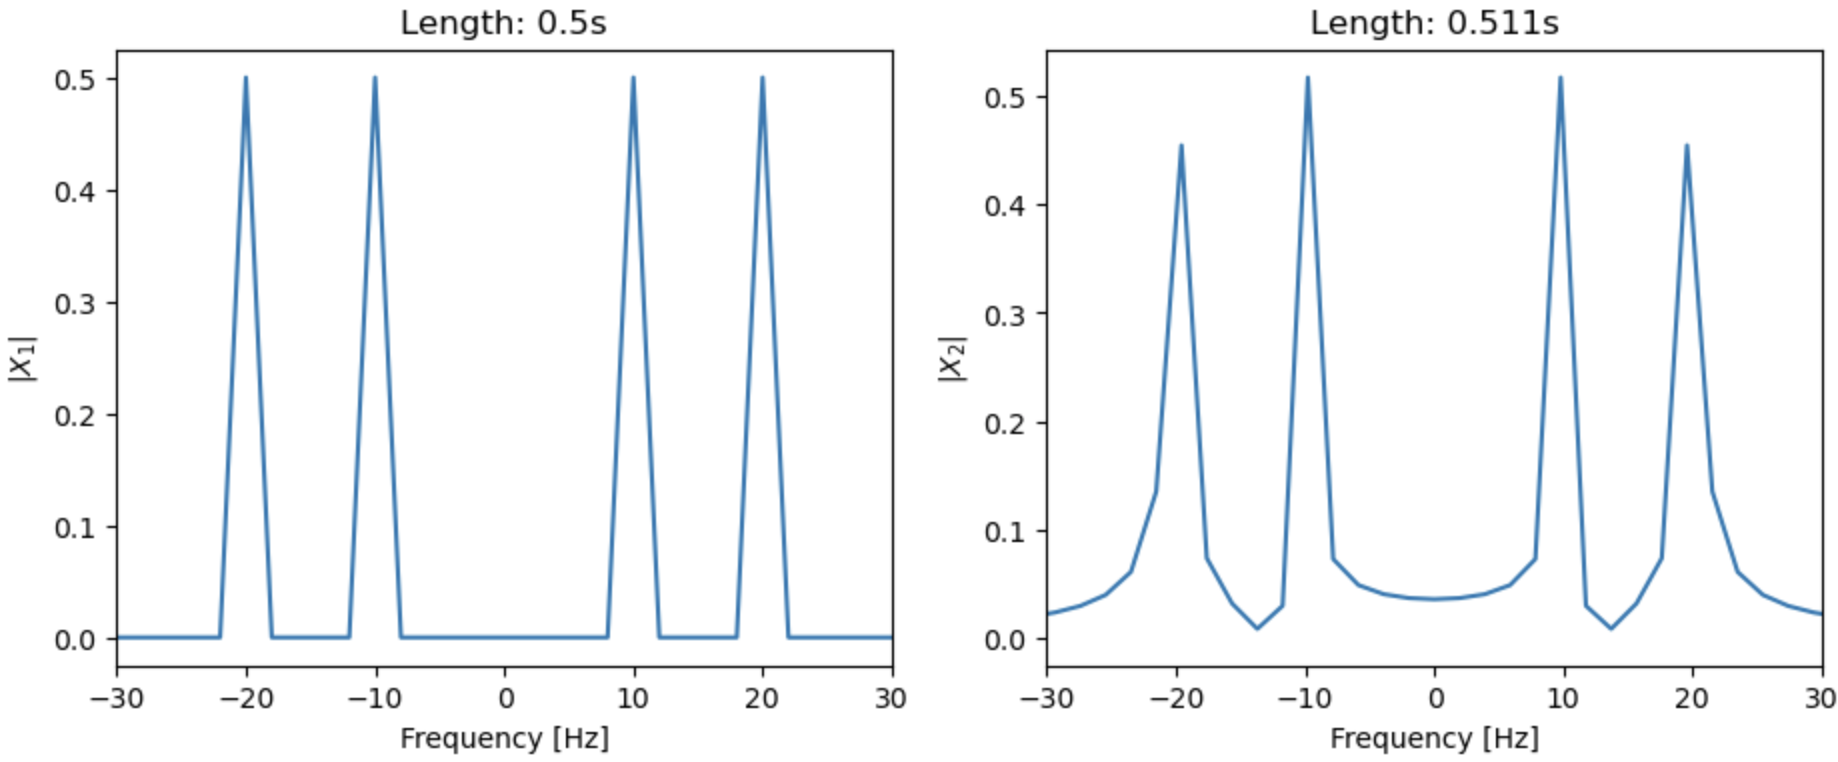
</div>

In [235]:
def DFT (x,T,fs):
    X = np.fft.fft(x)
    n = T*fs
    timestep = 1/fs
    freq = np.fft.fftfreq(int(n), d=timestep)
    X = X / n
    freq, X = np.fft.fftshift((freq, X), axes=1)
    Amp = np.abs(X)
    return (freq, Amp)

<function matplotlib.pyplot.show(close=None, block=None)>

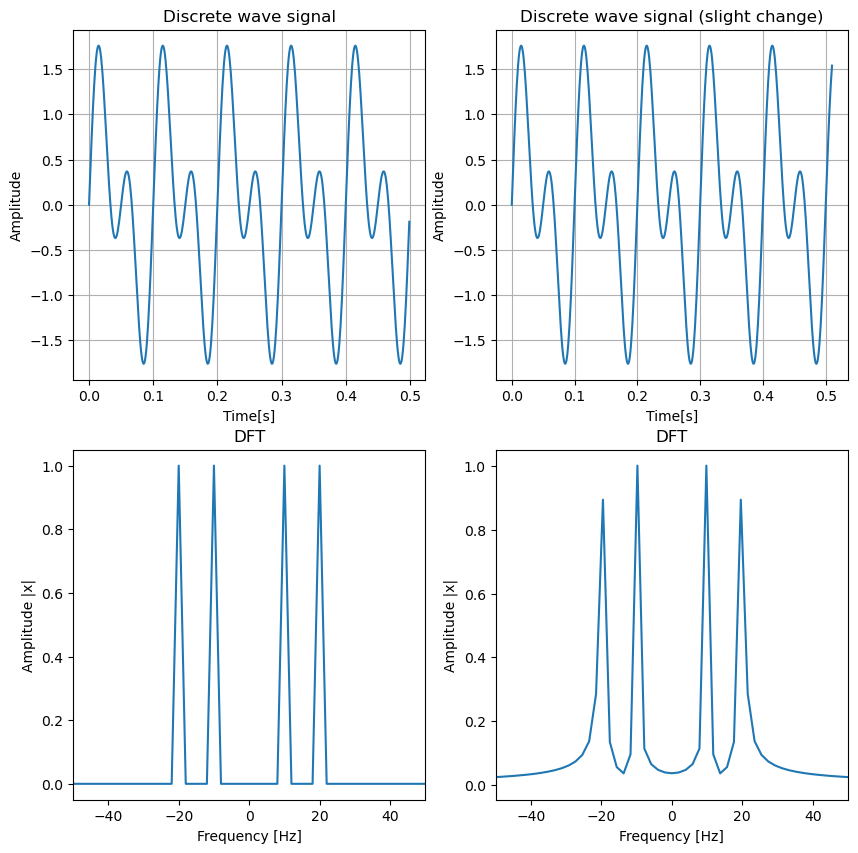

In [236]:
fs = 1000
T= 0.5 # Time in seconds.
T1 = 0.511
nTs = np.arange(0,T*fs)/fs # Defining the sampling time instants for T seconds.

a1 = np.sin(2*np.pi*10*nTs)
a2 = np.sin(2*np.pi*20*nTs)
x1 = a1 + a2 

fig = plt.figure(figsize = (10,10)); fig.clf()
axSignal = fig.add_subplot(221)
axSignal.plot(nTs,x1) 
plt.title("Discrete wave signal")
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.grid()

nTs_sh = np.arange(0,T1*fs)/fs # Defining the sampling time instants for T seconds.

a1_sh = np.sin(2*np.pi*10*nTs_sh)
a2_sh = np.sin(2*np.pi*20*nTs_sh)
x2 = a1_sh + a2_sh 

axSignal = fig.add_subplot(222)
axSignal.plot(nTs_sh,x2) 
plt.title("Discrete wave signal (slight change)")
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.grid()
# plt.xlim([0.45,0.55])

### DFT ###
axMagnitude = fig.add_subplot(223)
axMagnitude.plot(DFT(x1,0.5,1000)[0],DFT(x1,0.5,1000)[1]) # Plot the magnitude spectrum
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude |x|")
plt.title("DFT")
plt.xlim([-50,50])

axMagnitude = fig.add_subplot(224)
axMagnitude.plot(DFT(x2,0.511,1000)[0],DFT(x2,0.511,1000)[1]) # Plot the magnitude spectrum
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude |x|")
plt.title("DFT")
plt.xlim([-50,50])

plt.show

##### ・What do you observe? What could give rise to this effect?
The amplitude spectrum resulted from  $x_2$ has less resolution than  $x_1$.
This could be due to a discontinuity at a signal boundary caused by the small change of a length from 0.5s to 0.511s


One way to mitigate this effect is by using _windowing_. Windowing generally means to multiply the time domain waveform with a (typically smooth) function which tapers to 0 at the boundaries (beginning and end of the segment) and has a maximum of 1 in the middle. Several windows exist, each with different trade-offs. We shall investigate 3 most commonly used ones:

- Rectangular window: This essentially is the same as not windowing your time-domain signal before calculating the DFT. you can use the [`np.ones`][ones] function to generate this window  
- [von Hann][hann] window: 
- Hybrid windows: Such windows combine the gentle onset and offset characteristics of tapering windows with the flat characteristics of the rectangular windows. We shall design such a window where the edges are taken from the characteristics of a von Hann window and the flat characteristic of the rectangular window is taken for the middle. You can experiment with this window by varying the "fade-in" and "fade-out" widths. These are generated by, respectively, the left and right half of a von Hann window of twice the size of the fade width. 

<div class="alert alert-info">
    
**Task** 

- Generate the three windowing functions above, with duration of $0.511 \unit{s}$ and $\fsamp=1000\unit{Hz}$. 
- For the hybrid window, play with two different values of the fade-in and fade-out width (e.g., $50\unit{ms}$ and one other value of your choice). Ensure that the resulting hybrid window shows no sudden "jumps"    
- Plot and examine the properties of these windows in the time _and_ frequency domain. **Important:** When plotting the frequency spectrum, zero-pad the signal to **four times** the window length to better see the underlying spectrum of the windows.
- Describe the time- and frequency-domain properties of these windows in the answer box, along with what you expect their effect on the signal to be.

Some handy functions are: `int`, [`np.ones`][ones] and [`np.concatenate`][concatenate]
</div>

[ones]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html
[concatenate]: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy-concatenate
[hann]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.hanning.html


What your answer should look like (for the time-domain version of the windows):

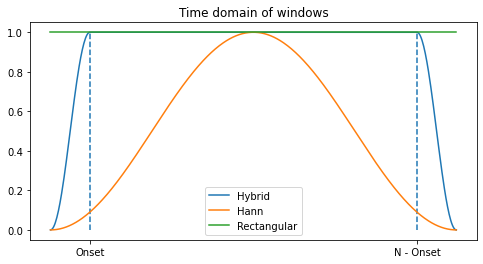

And for the frequency domain:
<div>
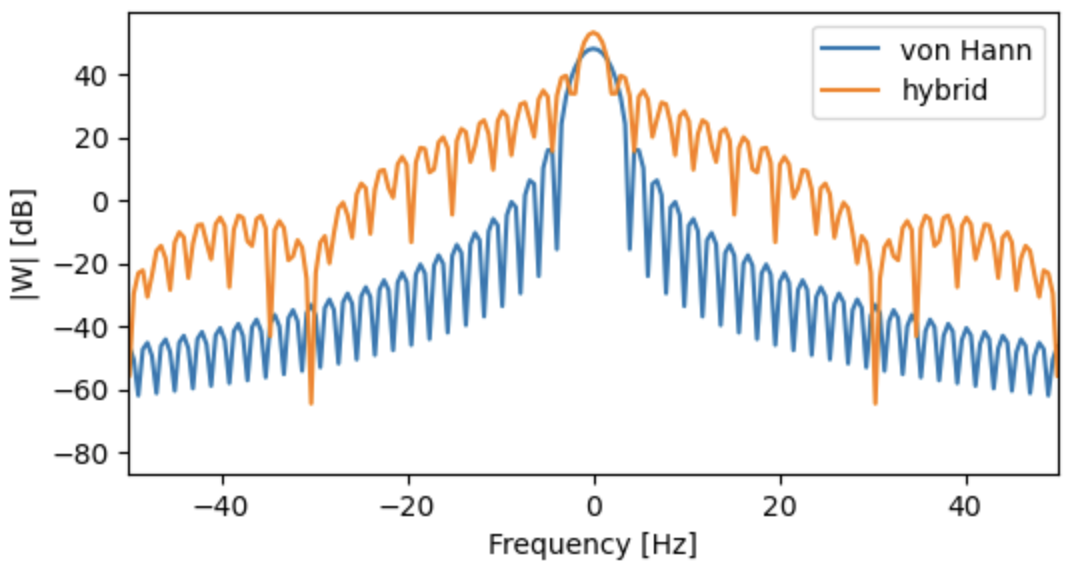
</div>

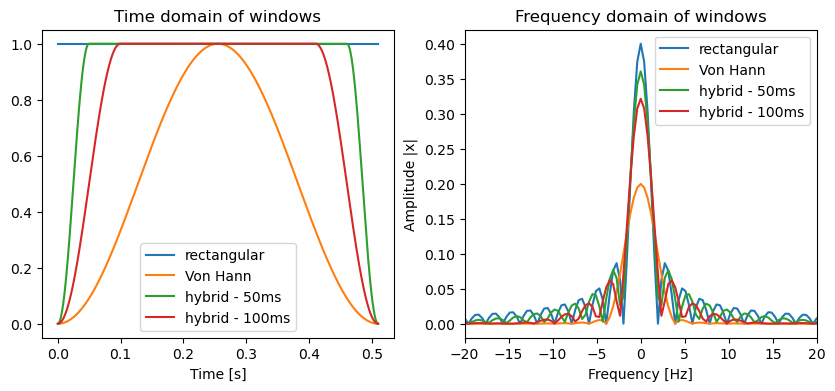

In [237]:
T = 0.511 
fs = 1000
n = T*fs
nTs = np.arange(0,T*fs)/fs

rec = np.ones(int(n))
hann = np.hanning(n)
hann1 = np.hanning(100)
hann2 = np.hanning(200)
hy50 = np.concatenate((hann1[:50],rec[:411],hann1[50:]))
hy100 = np.concatenate((hann2[:100],rec[:311],hann2[100:]))

fig = plt.figure(figsize = (10,4)); fig.clf()
axwin = fig.add_subplot(121)
plt.title("Time domain of windows")
axwin.plot(nTs,rec)
axwin.plot(nTs,hann)
axwin.plot(nTs,hy50)
axwin.plot(nTs,hy100)
plt.xlabel("Time [s]")
axwin.legend(['rectangular', 'Von Hann', 'hybrid - 50ms', 'hybrid - 100ms'])
plt.show

### DFT ###
# Rectangular window
rec_p = np.concatenate((rec,np.zeros(len(rec)*4))) # the number of data points

Rec = np.fft.fft(rec_p)
n = len(rec_p)
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Rec = Rec / (n)
freq, Rec = np.fft.fftshift((freq, Rec), axes=1)
Amp = np.abs(Rec)
axMagnitude = fig.add_subplot(122)
axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude |x|")
plt.title("Frequency domain of windows")
plt.xlim([-20,20])

# von hanning window
hann_p = np.concatenate((hann,np.zeros(len(hann)*4))) # the number of data points

Hann = np.fft.fft(hann_p)
n = len(hann_p)
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Hann = Hann / (n)
freq, Hann = np.fft.fftshift((freq, Hann), axes=1)
Amp = np.abs(Hann)
axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum


# hybrid window(50ms)
hy50_p = np.concatenate((hy50,np.zeros(len(hy50)*4))) # the number of data points

Hy50 = np.fft.fft(hy50_p)
n = len(hy50_p)
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Hy50 = Hy50 / (n)
freq, Hy50 = np.fft.fftshift((freq, Hy50), axes=1)
Amp = np.abs(Hy50)
axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum

# hybrid window(100ms)
hy100_p = np.concatenate((hy100,np.zeros(len(hy100)*4))) # the number of data points

Hy100 = np.fft.fft(hy100_p)
n = len(hy100_p)
timestep = 1/fs #sampling period[s]
freq = np.fft.fftfreq(int(n), d=timestep)
Hy100 = Hy100 / (n)
freq, Hy100 = np.fft.fftshift((freq, Hy100), axes=1)
Amp = np.abs(Hy100)
axMagnitude.plot(freq,Amp) # Plot the magnitude spectrum
axMagnitude.legend(['rectangular', 'Von Hann', 'hybrid - 50ms', 'hybrid - 100ms'])



<div class="alert alert-success">
<div class="alert alert-info">
<span style="color:blue">

##### ・Describe the time- and frequency-domain properties of these windows in the answer box, along with what you expect their effect on the signal to be.

**In the time domain, the rectangular window is a simple line, extending from 0 to the given duration(0.511s), while the von hann window shows a parabola like shape, which it has a peak on the half of the given time.**

**In the frequency domain, the rectangular window has the widest lobe and high sidelobes, while the von hann window has the narrowest lobe and lowest sidelobes among other windows.**
**Both windows can result in reduced frequency resolution.**

We shall now verify our expectations regarding the effect of the windows by applying them to the previously generated signal of length $0.511\unit{s}$.

<div class="alert alert-info">
    
**Task** 

* Apply the generated windows to the signal $x_2$ you generated previously. Note: applying a window means multiplying the signal with the generated window.
* Plot the windowed time-domain signal and the corresponding frequency (amplitude) spectrum. In the spectrum plots, limit the x-axis of your figures to show content between -50 and 50 Hz. 
* Based on the plots, answer the following:
    * What is the benefit of applying a window to your signal before computing the DFT?
    * List one trade-off to consider when applying windowing to recorded signals
</div>

What your answer should look like:
<div>
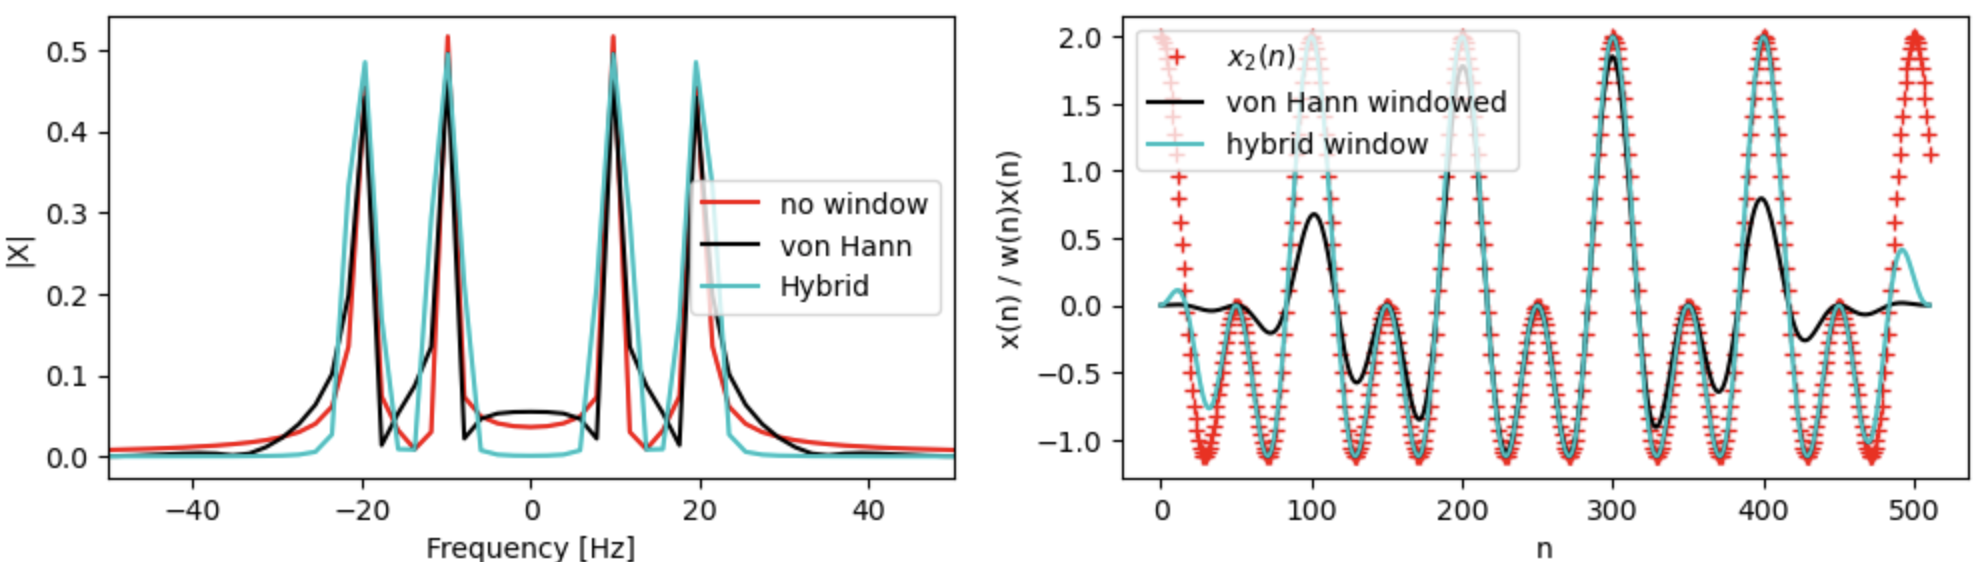
</div>

In [238]:
def wave(x):
    axSignal.plot(nTs,x) 
    plt.xlabel("Time[s]")
    plt.ylabel("Amplitude")
    plt.grid()

<function matplotlib.pyplot.show(close=None, block=None)>

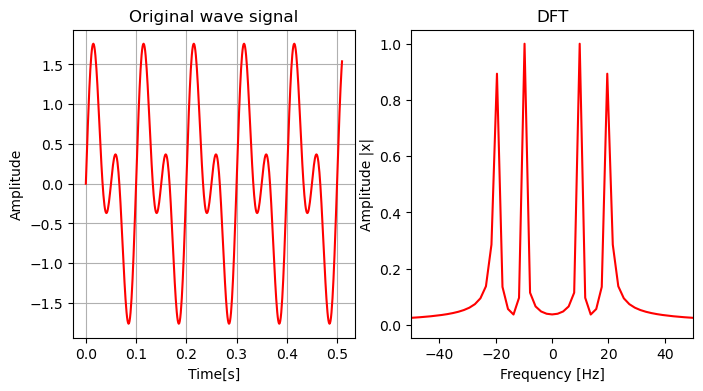

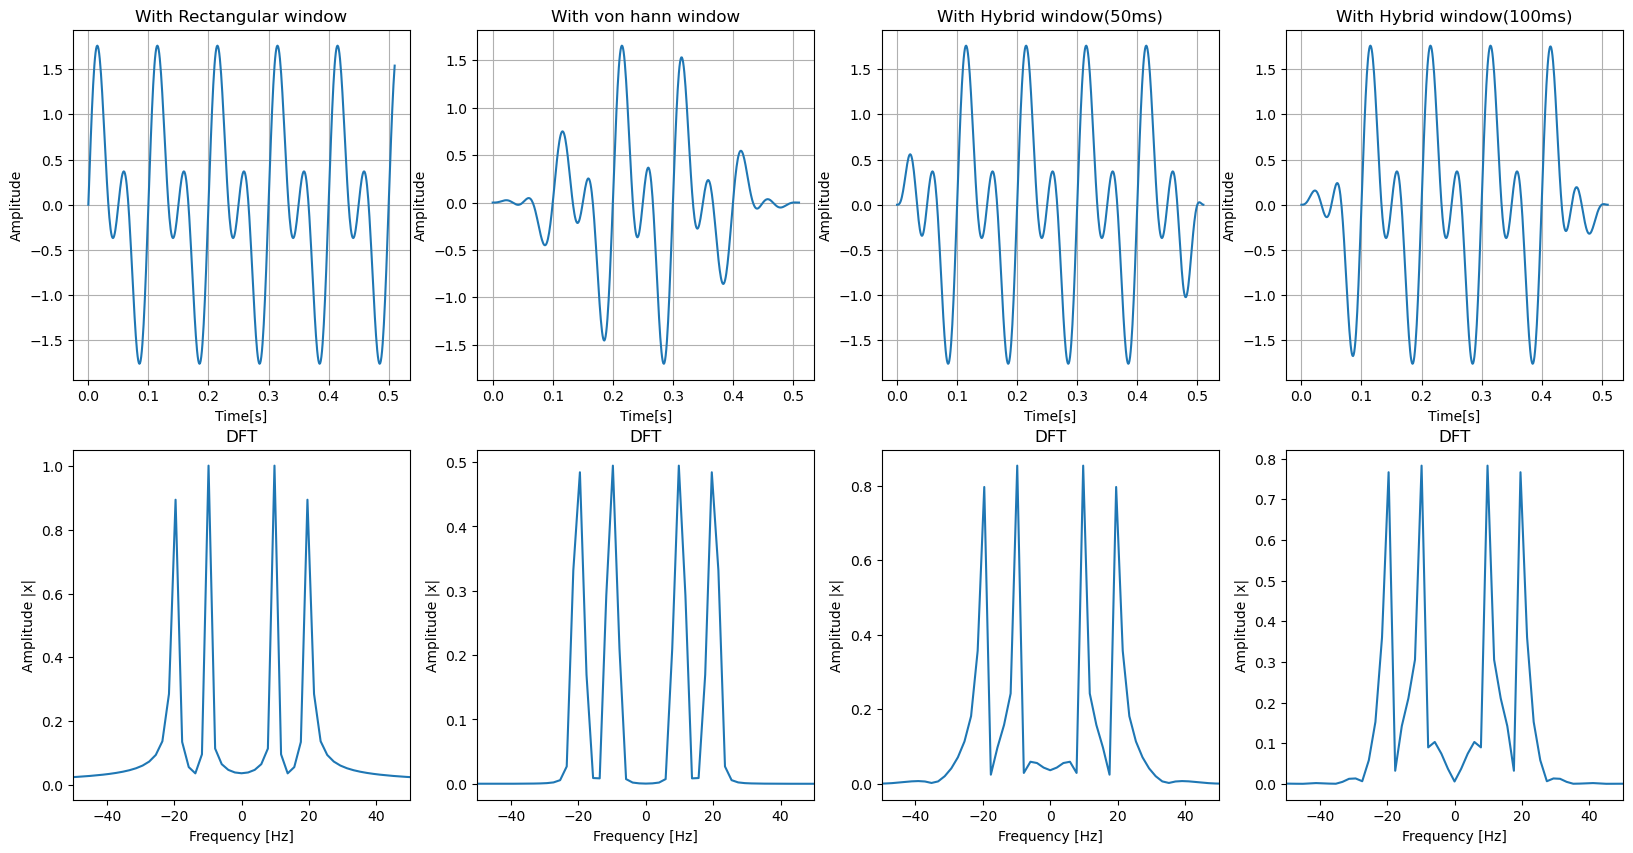

In [239]:
fig = plt.figure(figsize = (8,4)); fig.clf()
axSignal = fig.add_subplot(121)
axSignal.plot(nTs_sh,x2, color = 'red') 
plt.title("Original wave signal")
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.grid()

axMagnitude = fig.add_subplot(122)
axMagnitude.plot(DFT(x2,0.511,1000)[0],DFT(x2,0.511,1000)[1],color='red') # Plot the magnitude spectrum
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude |x|")
plt.title("DFT")
plt.xlim([-50,50])

plt.show

# rectangular window
x2_rec = x2*rec
x2_hann = x2*hann
x2_hy50 = x2*hy50
x2_hy100 = x2*hy100

fs = 1000
T = 0.511
nTs = np.arange(0,T*fs)/fs # Defining the sampling time instants for T seconds.

fig = plt.figure(figsize = (20,10)); fig.clf()
axSignal = fig.add_subplot(241)
wave(x2_rec)
plt.title(f"With Rectangular window")

axSignal = fig.add_subplot(242)
wave(x2_hann)
plt.title(f"With von hann window")

axSignal = fig.add_subplot(243)
wave(x2_hy50)
plt.title(f"With Hybrid window(50ms)")

axSignal = fig.add_subplot(244)
wave(x2_hy100)
plt.title(f"With Hybrid window(100ms)")


### DFT ###
DFT (x2_rec,T,1000)
axMagnitude = fig.add_subplot(245)
axMagnitude.plot(DFT (x2_rec,T,1000)[0],DFT (x2_rec,T,1000)[1])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude |x|")
plt.title("DFT")
plt.xlim([-50,50])

DFT (x2_hann,T,1000)
axMagnitude = fig.add_subplot(246)
axMagnitude.plot(DFT (x2_hann,T,1000)[0],DFT (x2_hann,T,1000)[1])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude |x|")
plt.title("DFT")
plt.xlim([-50,50])

DFT (x2_hy50,T,1000)
axMagnitude = fig.add_subplot(247)
axMagnitude.plot(DFT (x2_hy50,T,1000)[0],DFT (x2_hy50,T,1000)[1])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude |x|")
plt.title("DFT")
plt.xlim([-50,50])

### DFT ###
DFT (x2_hy100,T,1000)
axMagnitude = fig.add_subplot(248)
axMagnitude.plot(DFT (x2_hy100,T,1000)[0],DFT (x2_hy100,T,1000)[1])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude |x|")
plt.title("DFT")
plt.xlim([-50,50])

plt.show

<div class="alert alert-success">
<div class="alert alert-info">
<span style="color:blue">

##### ・ What is the benefit of applying a window to your signal before computing the DFT?

**From the time domain graphs, even if you windowed the signal with the rectangular window, this does not help to improve the freqency resolution. However, applying the von hann window and two hybrid winods to the signal results in the absence of discontinuities at signal boundary, which means to smearing the signal spectrum. With hybrid windows, the resultant spectrums show that freqencies were part spread out, but von hann windows demostrated that the best improvement in the frequency resolutuion.**

**Therefore, the benefit of mulitplying with widons is to enforce peiodic nature of recorded signal and improve frequncy resolution.**


##### ・ List one trade-off to consider when applying windowing to recorded signals.
**Comparing the graphs of time domain between the recored signals and windowed signals, it is clear that the number of circles decreased after windowing. This tells us that one trade-off to consider when it comes to applying windows, is to reduce the time resolution, which may result in inability of acculately caputuring short-time rapid changes after applying it.**